In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
 
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

In [4]:
from pandas import read_csv

In [9]:
dataset =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [10]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
dataset.replace('?', nan, inplace=True)
 
dataset = dataset.astype('float32')

In [12]:
values= dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [13]:
dataset.to_csv('household_power_consumption.csv')

In [14]:
dataset = read_csv('household_power_consumption.csv',header=None)
print(dataset.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                     0                    1  ...               7               8
0             datetime  Global_active_power  ...  Sub_metering_3  sub_metering_4
1  2006-12-16 17:24:00                4.216  ...            17.0        52.26667
2  2006-12-16 17:25:00                 5.36  ...            16.0       72.333336
3  2006-12-16 17:26:00                5.374  ...            17.0       70.566666
4  2006-12-16 17:27:00                5.388  ...            17.0            71.8

[5 rows x 9 columns]


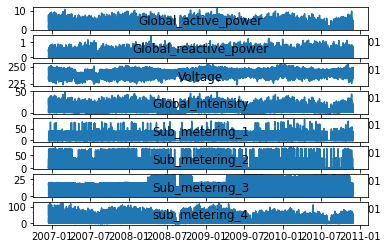

In [45]:
#line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()


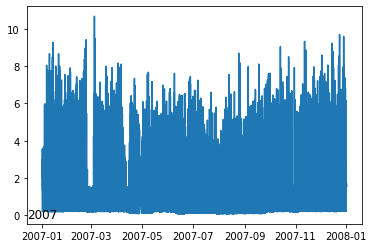

In [16]:
# yearly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

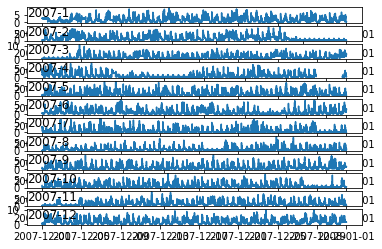

In [18]:
# monthly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

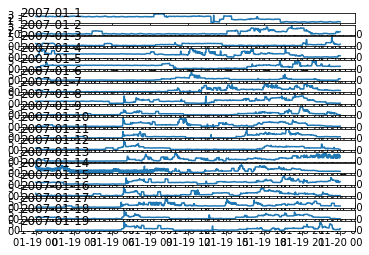

In [19]:
# daily line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()


In [20]:
dataset.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
sub_metering_4           True
dtype: bool

In [21]:
dataset["Global_active_power"].fillna(dataset["Global_active_power"].mean(),inplace = True)
dataset["Global_reactive_power"].fillna(dataset["Global_reactive_power"].mean(),inplace = True)
dataset["Voltage"].fillna(dataset["Voltage"].mean(),inplace = True)
dataset["Global_intensity"].fillna(dataset["Global_intensity"].mean(),inplace = True)
dataset["Sub_metering_1"].fillna(dataset["Sub_metering_1"].mean(),inplace = True)
dataset["Sub_metering_2"].fillna(dataset["Sub_metering_2"].mean(),inplace = True)
dataset["Sub_metering_3"].fillna(dataset["Sub_metering_3"].mean(),inplace = True)
dataset["sub_metering_4"].fillna(dataset["sub_metering_4"].mean(),inplace = True)

In [22]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
sub_metering_4           False
dtype: bool

In [23]:
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]
 # mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')

In [24]:
x=dataset.iloc[:,0:7].values
y=dataset.iloc[:,7].values

In [25]:
x

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      dtype=float32)

In [26]:
y

array([52.26667 , 72.333336, 70.566666, ..., 15.633333, 15.566667,
       15.533334], dtype=float32)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2,random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
ypred = lr.predict(x_test)

In [30]:
ypred

array([33.85987 , 17.826485, 11.092237, ...,  5.159409, 30.893646,
       21.194862], dtype=float32)

In [31]:
y_test

array([33.866665 , 17.833332 , 11.1      , ...,  5.1666665, 30.900002 ,
       21.2      ], dtype=float32)

In [32]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [33]:
accuracy

0.9999993608176291

In [34]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0,15.633333


In [35]:
pre1=lr.predict([[4,0.41,240,15,0,1,17]])

In [36]:
pre1

array([48.66511063])

In [46]:
y_test.dtype

dtype('float32')

In [47]:
ypred.dtype

dtype('float32')

In [48]:
x.dtype

dtype('float32')

In [49]:
y.dtype

dtype('float32')

In [38]:
dataset.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
sub_metering_4           float32
dtype: object

In [39]:
x= x.astype(np.float32)

In [40]:
y= y.astype(np.float32)

In [41]:
dataset= dataset.astype(np.float32)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = dataset.corr()

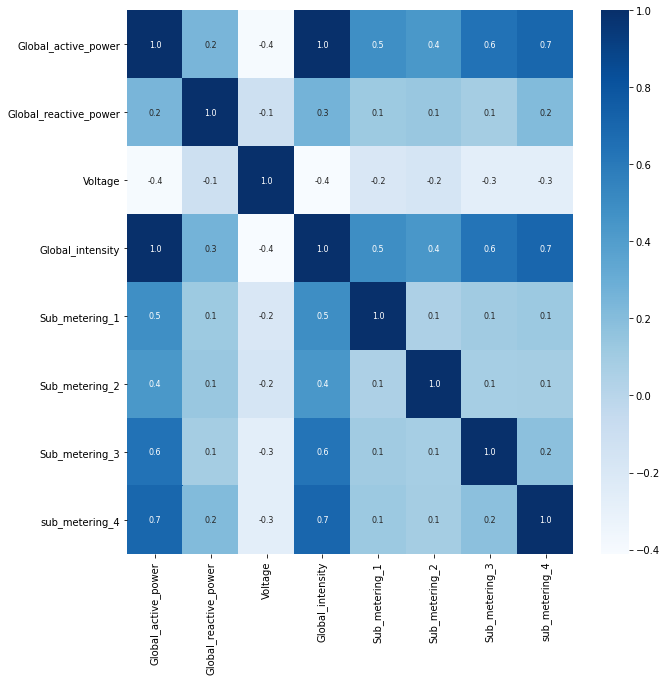

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [53]:
import pickle
pickle.dump(lr,open('pcfha.pkl','wb'))